In [138]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
sales = pd.read_csv('sales_612.csv')

In [140]:
products = pd.read_csv('products_612.csv')

In [141]:
customers = pd.read_csv('customers_612.csv')

In [142]:
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])

In [143]:
products['launch_date'] = pd.to_datetime(products['launch_date'])

In [144]:
customers['registration_date'] = pd.to_datetime(customers['registration_date'])

In [145]:
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['day_name'] = sales['transaction_date'].dt.day_name()
sales['day_of_week'] = sales['transaction_date'].dt.day_of_week

In [146]:
sales_with_category = sales.merge(products[['category', 'product_id']], on= 'product_id')

In [147]:
sales_with_category.groupby('category')
sales_with_cateogry.value_counts('category')

category
Electronics          33
Clothing             31
Accessories          30
Home & Garden        30
Sports & Outdoors    26
Name: count, dtype: int64

In [148]:
sns.set_theme(style='whitegrid', context='talk')

In [149]:
plt.rcParams.update()

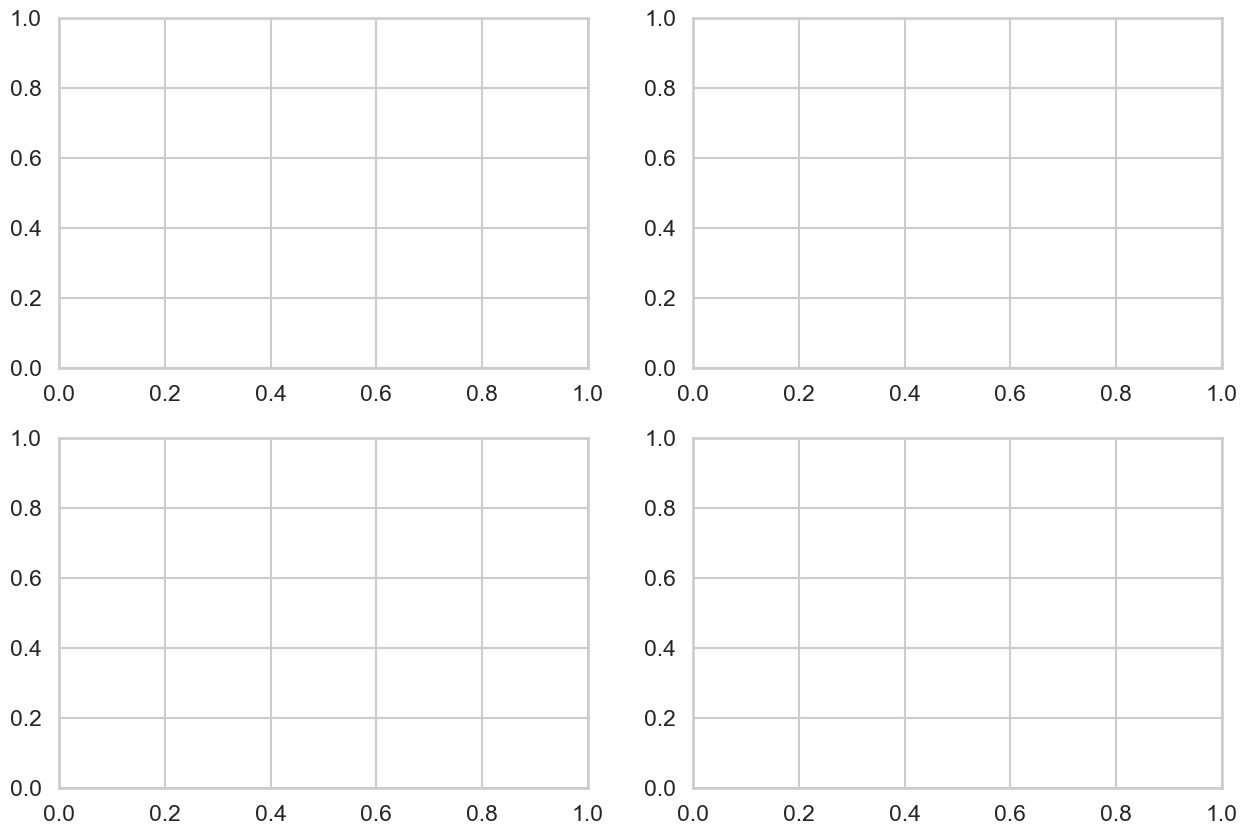

In [150]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

In [151]:
fig.suptitle('Retail Chain Performance: Executive Summary Dashboard', 
             fontsize=20, fontweight='bold')

Text(0.5, 0.98, 'Retail Chain Performance: Executive Summary Dashboard')

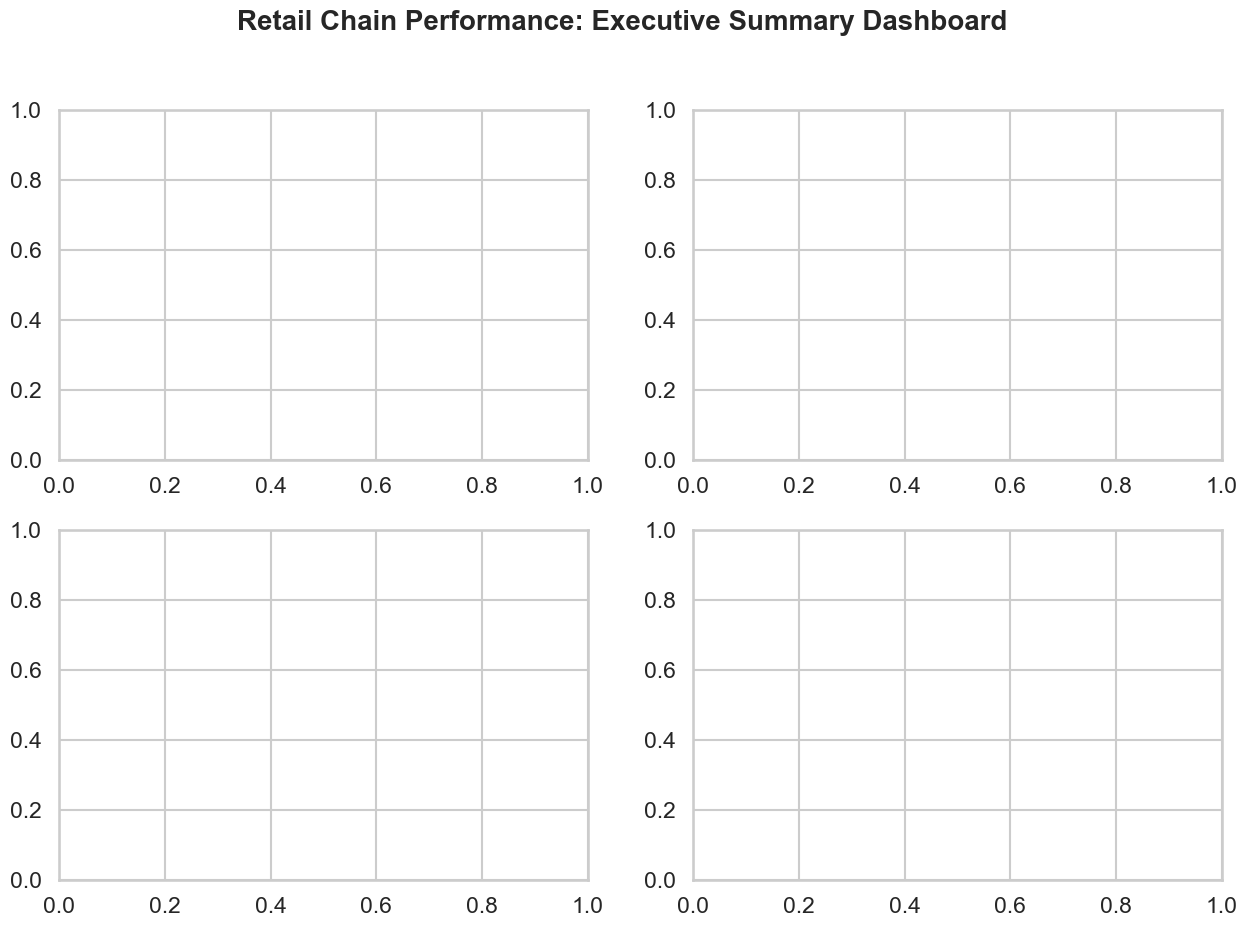

In [152]:
fig

In [153]:
transaction_amounts = sales['total_amount']

In [154]:
sales_with_cateogry= sales.merge(products[['product_id', 'category']], on ='product_id')
category_revenue=sales_with_category.groupby('category')['total_amount'].sum().sort_values(ascending=False)
state_customer_counts=customers['state'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_amount = sales.groupby('day_name')['total_amount'].mean().reindex(day_order)
daily_avg_amount - daily_avg_amount.fillna(0)

day_name
Monday       0.0
Tuesday      0.0
Wednesday    0.0
Thursday     0.0
Friday       0.0
Saturday     0.0
Sunday       0.0
Name: total_amount, dtype: float64

In [155]:
transaction_amounts = sales['total_amount']

In [156]:
sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax1)

<Axes: ylabel='category'>

In [157]:
sns.barplot(x=category_revenue.values, y=category_revenue.index, ax=ax1)
ax1.set_title('Revenue by Product Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Revenue ($)')
ax1.set_ylabel('Product Category')

Text(4.444444444444445, 0.5, 'Product Category')

In [158]:
top_states = state_customer_counts.head(6)
sns.barplot(x=top_states.values, y=top_states.index, ax=ax2)
ax2.set_title('Customer Distribution by State (top 6)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Customers')
ax2.set_ylabel('State')

Text(638.5353535353534, 0.5, 'State')

In [159]:
sns.lineplot(
    x=daily_avg_amount.index,
    y=daily_avg_amount.values,
    marker='o',
    ax=ax3
)

<Axes: xlabel='day_name'>

In [160]:

ax3.plot(range(len(daily_avg_amount)), daily_avg_amount.values,
         marker='o',
         linewidth=2,
         markersize=6)

In [161]:
ax3.set_title('average transactoin value by day of week', fontsize=14, fontweight='bold')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('average transaction amount ($)')

Text(4.444444444444445, 0.5, 'average transaction amount ($)')

In [162]:
ax3.set_xticks(range(len(daily_avg_amount)))
ax3.set_xticklabels(daily_avg_amount.index, rotation=45)

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

In [163]:
sns.histplot(transaction_amounts, bins=15, ax=ax4, alpha=0.7)
ax4.set_title('transaction amount distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('transaction amount ($)')
ax4.set_ylabel('count')

Text(638.5353535353534, 0.5, 'count')

In [164]:
mean_amount=transaction_amounts.mean()
ax4.axvline(mean_amount,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'mean: ${mean_amount:.2f}')

In [165]:
ax4.legend()
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

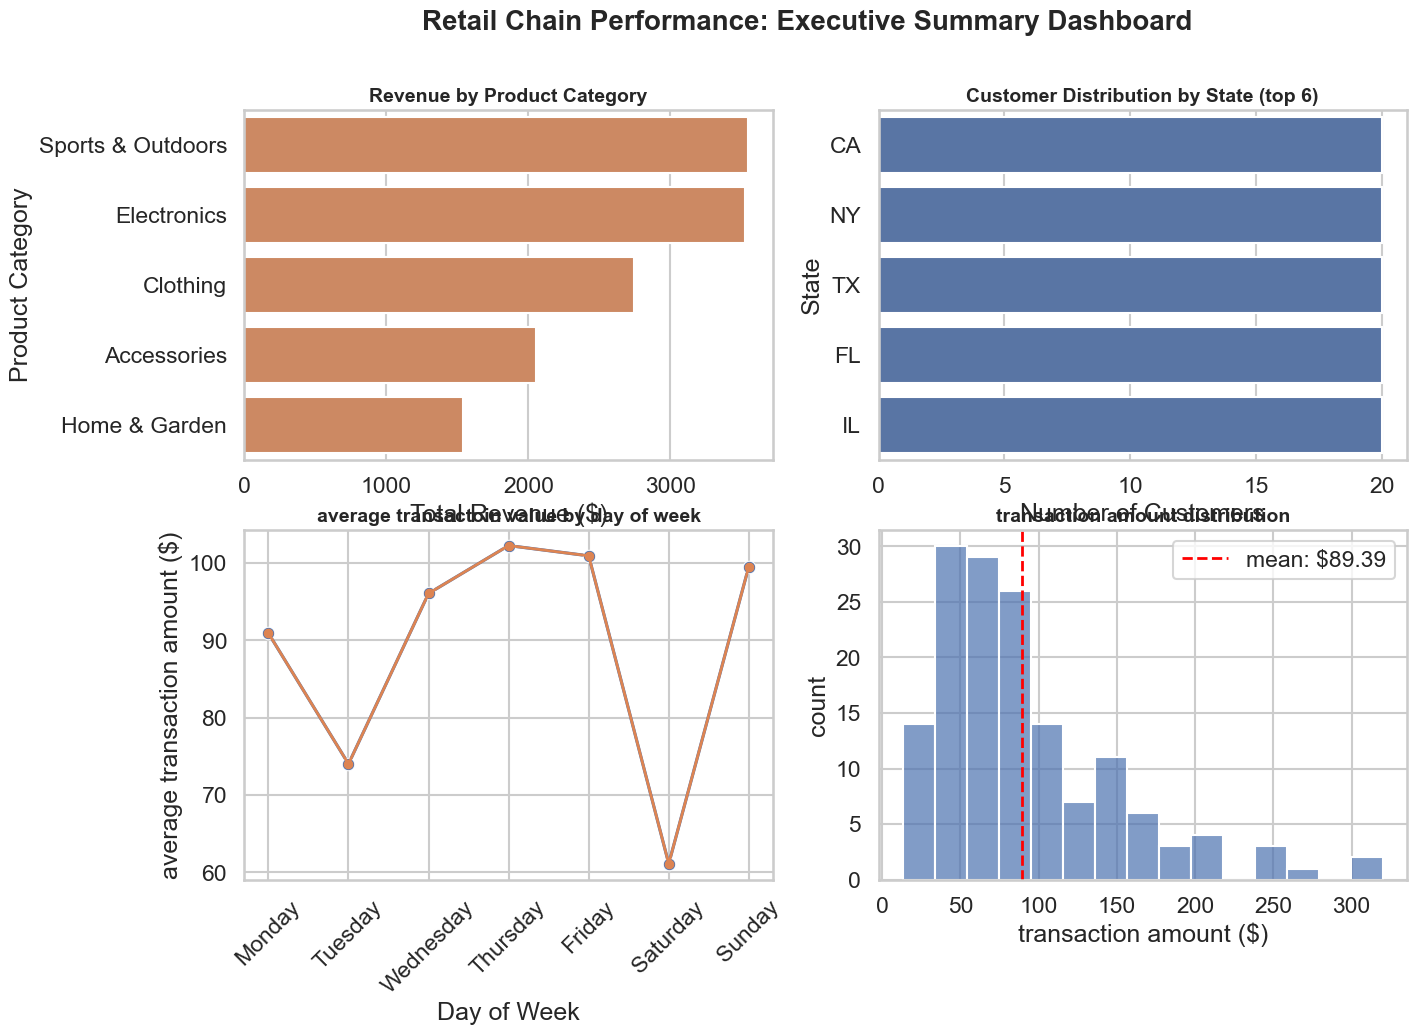

In [166]:
fig

In [167]:
print(daily_avg_amount)

day_name
Monday        90.927500
Tuesday       74.028636
Wednesday     96.071905
Thursday     102.267619
Friday       100.940833
Saturday      61.121905
Sunday        99.551429
Name: total_amount, dtype: float64
